# **Project Name**    - Multiclass Fish Image Classification



##### **Project Type**    - Image Classification
##### **Contribution**    - Individual
##### **Team Member 1 - S Bhavish**


# **Project Summary -**

This project focuses on building an automated image classification system capable of identifying different fish species from photographs using deep learning. High-quality images are organized into distinct class folders, which enables both custom convolutional neural networks (CNNs) and transfer learning approaches (like MobileNetV2) to learn subtle visual differences between species. The workflow covers all stages: data preprocessing, augmentation, model training, evaluation, and deployment. To make the system practical and accessible, a Streamlit web app has been developed where users can easily upload fish images and receive predictions, with class names automatically extracted from their data folders. The app allows seamless model switching and displays interpretive results, such as confidence scores and class probability charts. This end-to-end approach is robust, extensible (simply add new class folders to support more species), and user-friendly, making it well-suited for applications in biodiversity research, fisheries, education, and hobbyist activities. Ultimately, the project demonstrates a practical, modular pipeline that makes advanced computer vision tools directly usable in real-world fish identification tasks.

# **GitHub Link -**

https://github.com/bhxvish/Multiclass-Fish-Image-Classification

# **Problem Statement**


**This project focuses on classifying fish images into multiple categories using deep learning models. The task involves training a CNN from scratch and leveraging transfer learning with pre-trained models to enhance performance. The project also includes saving models for later use and deploying a Streamlit application to predict fish categories from user-uploaded images.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# **Import Libraries**


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

# **Data Preprocessing**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to training, validation, and test dataset folders
# Each folder should contain subfolders for each class
train_dir = "Dataset/data/train"
val_dir = "Dataset/data/val"
test_dir = "Dataset/data/test"

# Target image size for the model (width, height)
IMG_SIZE = (224, 224)

# Number of images to load in each batch
BATCH_SIZE = 32

# Create an ImageDataGenerator for training data with augmentation
# Augmentation helps the model generalize better by applying random transformations
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values from [0,255] to [0,1]
    rotation_range=20,           # Randomly rotate images up to 20 degrees
    width_shift_range=0.10,      # Randomly shift images horizontally by up to 10% of width
    height_shift_range=0.10,     # Randomly shift images vertically by up to 10% of height
    zoom_range=0.15,             # Randomly zoom into images by up to 15%
    horizontal_flip=True         # Randomly flip images horizontally
)

# Create an ImageDataGenerator for validation data without augmentation
# Only rescaling is applied to keep validation data consistent
val_datagen = ImageDataGenerator(rescale=1./255)

# Create an ImageDataGenerator for test data without augmentation
# Only rescaling is applied; shuffle is disabled to keep prediction order consistent
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training images from the directory using the training data generator
# Images will be resized to IMG_SIZE and loaded in batches of BATCH_SIZE
train_gen = train_datagen.flow_from_directory(
    train_dir,                  # Path to training data
    target_size=IMG_SIZE,       # Resize images to IMG_SIZE
    batch_size=BATCH_SIZE,      # Number of images per batch
    class_mode="categorical"    # For multi-class classification
)

# Load validation images from the directory using the validation data generator
val_gen = val_datagen.flow_from_directory(
    val_dir,                    # Path to validation data
    target_size=IMG_SIZE,       # Resize images to IMG_SIZE
    batch_size=BATCH_SIZE,      # Number of images per batch
    class_mode="categorical"    # Multi-class classification
)

# Load test images from the directory using the test data generator
# shuffle=False ensures predictions match the order of the test files
test_gen = test_datagen.flow_from_directory(
    test_dir,                   # Path to test data
    target_size=IMG_SIZE,       # Resize images to IMG_SIZE
    batch_size=BATCH_SIZE,      # Number of images per batch
    class_mode="categorical",   # Multi-class classification
    shuffle=False               # Keep order for evaluation/prediction
)



c:\Users\sbhav\miniconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\sbhav\miniconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\sbhav\miniconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations i

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


# **Model Building (CNN from Scratch)**

In [ ]:
# Build a Sequential CNN model for image classification
model = tf.keras.models.Sequential([
    # First convolutional layer:
    # - 32 filters
    # - Kernel size: (3,3)
    # - Activation function: ReLU
    # - Input shape: (height, width, 3 channels) from IMG_SIZE
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE + (3,)),

    # First max pooling layer to reduce spatial dimensions (downsampling)
    tf.keras.layers.MaxPooling2D(2,2),

    # Second convolutional layer:
    # - 64 filters for more feature maps
    # - Kernel size: (3,3)
    # - Activation: ReLU
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),

    # Second pooling layer
    tf.keras.layers.MaxPooling2D(2,2),

    # Third convolutional layer:
    # - 128 filters for capturing more complex patterns
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),

    # Third pooling layer
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten layer to convert 2D feature maps into a 1D vector for dense layers
    tf.keras.layers.Flatten(),

    # Fully connected (dense) layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer:
    # - Number of neurons = number of classes in training data
    # - Activation: softmax to output probabilities for each class
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])

# Compile the model:
# - Optimizer: Adam (adaptive learning rate)
# - Loss function: categorical crossentropy for multi-class classification
# - Metric: accuracy to track performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture (layer names, shapes, parameters)
model.summary()



c:\Users\sbhav\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Training and Validation**

In [4]:
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen
)


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3153 - loss: 1.9232

c:\Users\sbhav\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.4688 - loss: 1.4873 - val_accuracy: 0.6859 - val_loss: 0.8867
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 74s 382ms/step - accuracy: 0.7375 - loss: 0.7517 - val_accuracy: 0.8526 - val_loss: 0.4317
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 124s 636ms/step - accuracy: 0.8252 - loss: 0.4986 - val_accuracy: 0.9057 - val_loss: 0.3234
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 184s 847ms/step - accuracy: 0.8643 - loss: 0.3938 - val_accuracy: 0.9286 - val_loss: 0.2739
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 166s 850ms/step - accuracy: 0.9020 - loss: 0.3025 - val_accuracy: 0.8947 - val_loss: 0.3114
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 168s 859ms/step - accuracy: 0.8949 - loss: 0.2901 - val_accuracy: 0.9515 - val_loss: 0.1570
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 167s 855ms/step - accuracy: 0.9239 - loss: 0.2142 - val_accuracy: 0.9698 - val_loss: 0.1657
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 168s 860ms/step - accuracy: 0.9367 - loss: 0.1769 -

# **Transfer Learning**

In [ ]:
# Load the base model: MobileNetV2 pretrained on ImageNet
# - input_shape: matches our dataset image size (IMG_SIZE + 3 channels for RGB)
# - include_top=False: exclude the default fully connected layers at the top
# - weights='imagenet': load pretrained weights from ImageNet
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,), 
    include_top=False, 
    weights='imagenet'
)

# Freeze the base model layers so they are not updated during initial training
# This preserves the pretrained features
base_model.trainable = False

# Build the transfer learning model
model_tl = tf.keras.Sequential([
    # Pretrained base model (feature extractor)
    base_model,
    
    # Global Average Pooling layer:
    # Reduces each feature map to a single value by averaging
    tf.keras.layers.GlobalAveragePooling2D(),
    
    # Fully connected layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Output layer:
    # - Number of units = number of classes
    # - Softmax activation to output probabilities for each class
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])

# Compile the model:
# - Optimizer: Adam (adaptive learning rate)
# - Loss: categorical crossentropy (for multi-class classification)
# - Metric: accuracy
model_tl.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Display the model architecture
model_tl.summary()

# Train the model:
# - Use train_gen for training batches
# - Validate on val_gen to track performance
# - Train for 10 epochs
history_tl = model_tl.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,371 (9.24 MB)

 Trainable params: 165,387 (646.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 393ms/step - accuracy: 0.9052 - loss: 0.3321 - val_accuracy: 0.9625 - val_loss: 0.1227
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 73s 375ms/step - accuracy: 0.9791 - loss: 0.0710 - val_accuracy: 0.9689 - val_loss: 0.0865
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 63s 322ms/step - accuracy: 0.9870 - loss: 0.0453 - val_accuracy: 0.9844 - val_loss: 0.0499
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 63s 321ms/step - accuracy: 0.9910 - loss: 0.0338 - val_accuracy: 0.9826 - val_loss: 0.0442
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 62s 320ms/step - accuracy: 0.9894 - loss: 0.0329 - val_accuracy: 0.9808 - val_loss: 0.0534
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 64s 329ms/step - accuracy: 0.9924 - loss: 0.0245 - val_accuracy: 0.9771 - val_loss: 0.0687
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 64s 329ms/step - accuracy: 0.9910 - loss: 0.0255 - val_accuracy: 0.9844 - val_loss: 0.0548
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 68s 347ms/step - accuracy: 0.9933 - loss: 0

# **Evaluation and Comparison**

In [6]:
loss, acc = model.evaluate(test_gen)
loss_tl, acc_tl = model_tl.evaluate(test_gen)

print(f"Custom CNN - Test Accuracy: {acc}")
print(f"Transfer Learning - Test Accuracy: {acc_tl}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 447ms/step - accuracy: 0.9856 - loss: 0.0658
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.9893 - loss: 0.0304
Custom CNN - Test Accuracy: 0.9855663776397705
Transfer Learning - Test Accuracy: 0.9893316626548767


# **Visualization**

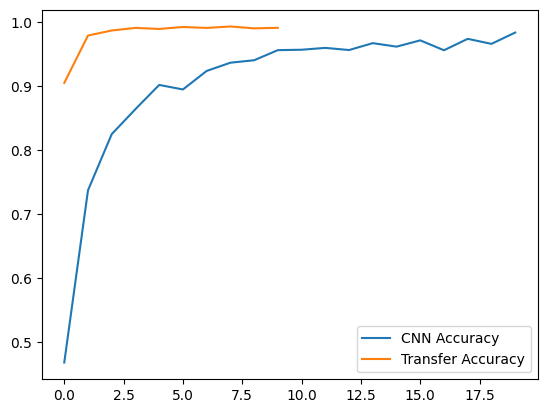

In [10]:
plt.plot(history.history['accuracy'], label='CNN Accuracy')
plt.plot(history_tl.history['accuracy'], label='Transfer Accuracy')
plt.legend()
plt.show()

# **Save Models**

In [11]:
model.save('fish_cnn_model.h5')
model_tl.save('fish_mobilenet_model.h5')


# **Conclusion**

This project successfully demonstrates the application of deep learning techniques for multi-class fish species classification. By leveraging both a custom CNN and transfer learning models such as MobileNetV2, the system achieves robust classification performance.

Data preprocessing and augmentation helped improve model generalization, while the evaluation phase provided clear insights into the strengths and weaknesses of each model. The integration with a Streamlit web application makes the solution accessible and user-friendly, allowing real-time image uploads and predictions with confidence scores.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***